In [2]:
import pandas as pd
import numpy as np


from sklearn.metrics import mean_absolute_error as mea

from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#wczytanie danych
df = pd.read_csv('./input/mauna_loa.csv')
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [6]:
#skrocona wersja konwersji daty na jedna kolumnę
df ['date'] =   pd.to_datetime( df [ ['year','month','day'] ] )
#df.index = df['date']
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16


In [7]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x )
#przemapowanie pustych danych na wartosci 0
df['ppm_fixed'].fillna(method='backfill',inplace= True)
#df['ppm_fixed'].plot();
df.head()
##plt.plot(df.date , df['ppm_fixed'])

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19,333.34
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26,332.95
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02,332.32
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09,332.18
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16,332.37


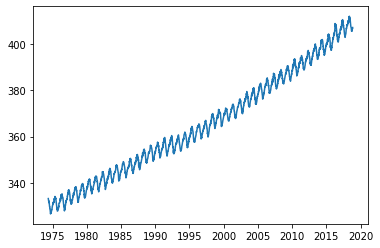

In [8]:
plt.plot(df.date , df.ppm_fixed)

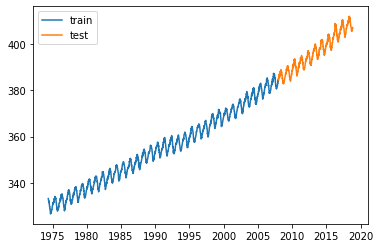

In [9]:
#podzial na train i test
cut_year = 2008
train = df [df.year < cut_year ]
test = df [df.year >= cut_year]

plt.plot  (train.date , train.ppm_fixed, label = 'train')
plt.plot  (test.date , test.ppm_fixed, label = 'test')

plt.legend()

## Propht

In [10]:
#model Propht
fb_df = train [['date', 'ppm_fixed']].copy()
fb_df.head()

#model Propht potrzebuje 2 kolumn ds i y
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [11]:
model = Prophet()

In [12]:
#trenowanie modelu
model.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
#ile krokow do porzdu, 'W' per tydzien, include_history= False uwzgledniac historie
future = model.make_future_dataframe(periods = len (test),freq = 'W',include_history= False) 
future.head()

,ds
0,2008-01-06
1,2008-01-13
2,2008-01-20
3,2008-01-27
4,2008-02-03


In [22]:
forecast = model.predict(future)

#yhat wynik prognozowany
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-06,385.042087,384.410098,385.440789,385.042087,385.042087,-0.119006,-0.119006,-0.119006,-0.119006,-0.119006,-0.119006,0.0,0.0,0.0,384.923081
1,2008-01-13,385.082520,384.639657,385.684893,385.082520,385.082520,0.055229,0.055229,0.055229,0.055229,0.055229,0.055229,0.0,0.0,0.0,385.137750
2,2008-01-20,385.122954,384.831707,385.855041,385.122954,385.122954,0.224589,0.224589,0.224589,0.224589,0.224589,0.224589,0.0,0.0,0.0,385.347543
3,2008-01-27,385.163387,385.031288,386.064355,385.163387,385.163387,0.384762,0.384762,0.384762,0.384762,0.384762,0.384762,0.0,0.0,0.0,385.548149
4,2008-02-03,385.203821,385.212299,386.227801,385.203821,385.203821,0.532006,0.532006,0.532006,0.532006,0.532006,0.532006,0.0,0.0,0.0,385.735827


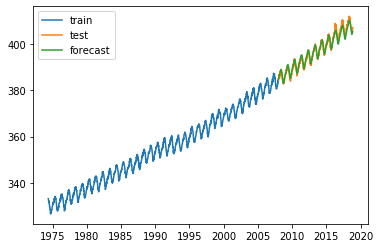

In [15]:
plt.plot  (train.date , train.ppm_fixed, label = 'train')
plt.plot  (test.date , test.ppm_fixed, label = 'test')
plt.plot  (test.date , forecast.yhat, label = 'forecast')

plt.legend();

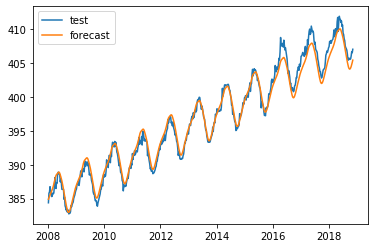

In [23]:
#plt.plot  (train.date , train.ppm_fixed, label = 'train')
plt.plot  (test.date , test.ppm_fixed, label = 'test')
plt.plot  (test.date , forecast.yhat, label = 'forecast')

plt.legend();

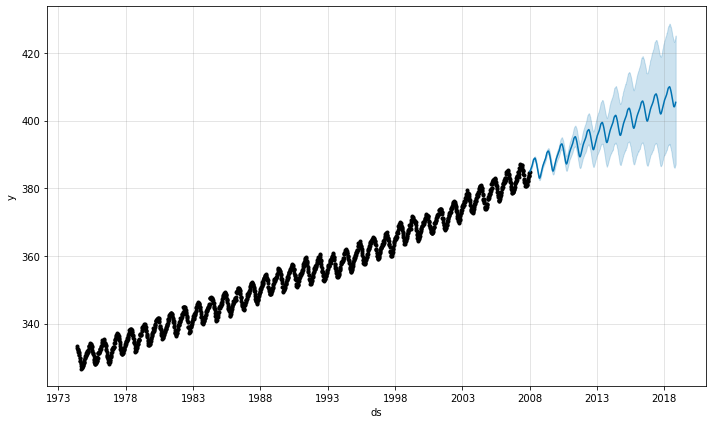

In [16]:
model.plot(forecast);

## Wizualizacja

In [17]:
#funkcja pomocnicza
def linear_func(dataset, k = None, b=0, offset_index=0):
    mean_value = np.mean(dataset)
    if k is None:
        return [mean_value] * len (dataset)
    return [(idx + offset_index)* k+b for idx, _ in enumerate(dataset.index)] 

k = 0.030
b = 388 

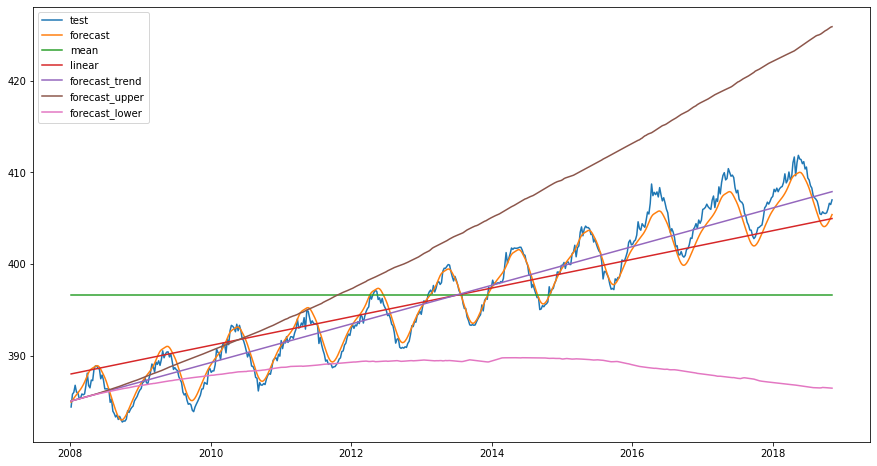

In [26]:
plt.figure(figsize = (15,8))
#plt.plot  (train.date , train.ppm_fixed, label = 'train')
plt.plot  (test.date , test.ppm_fixed, label = 'test')
plt.plot  (test.date , forecast.yhat, label = 'forecast')

plt.plot  (test.date , linear_func(test.ppm_fixed), label = 'mean')
plt.plot  (test.date , linear_func(test.ppm_fixed, k=k, b=b), label = 'linear')
plt.plot  (test.date , forecast.trend, label = 'forecast_trend')
plt.plot  (test.date , forecast.trend_upper, label = 'forecast_upper')
plt.plot  (test.date , forecast.trend_lower, label = 'forecast_lower')

plt.legend();

In [27]:
print ('mean = ', mea(test.ppm_fixed,linear_func(test.ppm_fixed)))
print ('linear  = ', mea(test.ppm_fixed,linear_func(test.ppm_fixed, k=k, b=b)))
print ('forecast_trend = ', mea(test.ppm_fixed,forecast.trend))
print ('forecast_upper = ', mea(test.ppm_fixed,forecast.trend_upper))
print ('forecast_lower = ', mea(test.ppm_fixed,forecast.trend_lower))

mean =  6.5032341520059
linear  =  2.6550176678445223
forecast_trend =  2.01060491603829
forecast_upper =  7.259076222895861
forecast_lower =  8.638284585338297
